# 들어가기 전

### csv파일 공유 링크
- https://drive.google.com/file/d/1T-EqaUObGRIlUh1sAxwC-soEU2iU_3l8/view?usp=sharing
- https://drive.google.com/file/d/1UOKilCBZrWEM6fZ4nPwtsV8phwIrmG2X/view?usp=sharing

### 각각 다운받은 후
- 알집을 통해 분할풀기
- 경로 맞추기


### -> 실습환경 완료

# start

In [500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 40
plt.rcParams['figure.figsize'] = [40, 20] # 전역으로 차트의 크기 설정
def setTick():
    plt.tick_params(colors='white', which='both', labelsize=20)

plt.style.use('default')
    
from IPython.display import set_matplotlib_formats
plt.rc("font", family="Malgun Gothic")
set_matplotlib_formats("retina")

fontdictHead={'fontsize': 50, 'color': 'yellow'}
fontdictBody={'fontsize': 30, 'color': 'white'}



In [501]:
df = pd.read_csv("./Merchant/상가업소정보_201912_01.csv", sep="|")
df.shape

(573680, 39)

In [502]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1168010600206040000,1,대지,604,NaN,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922


## 데이터 확인

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

## 결측치 확인

In [504]:
n = df.isnull().sum()
n

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

## 결측치 시각화

<AxesSubplot:>

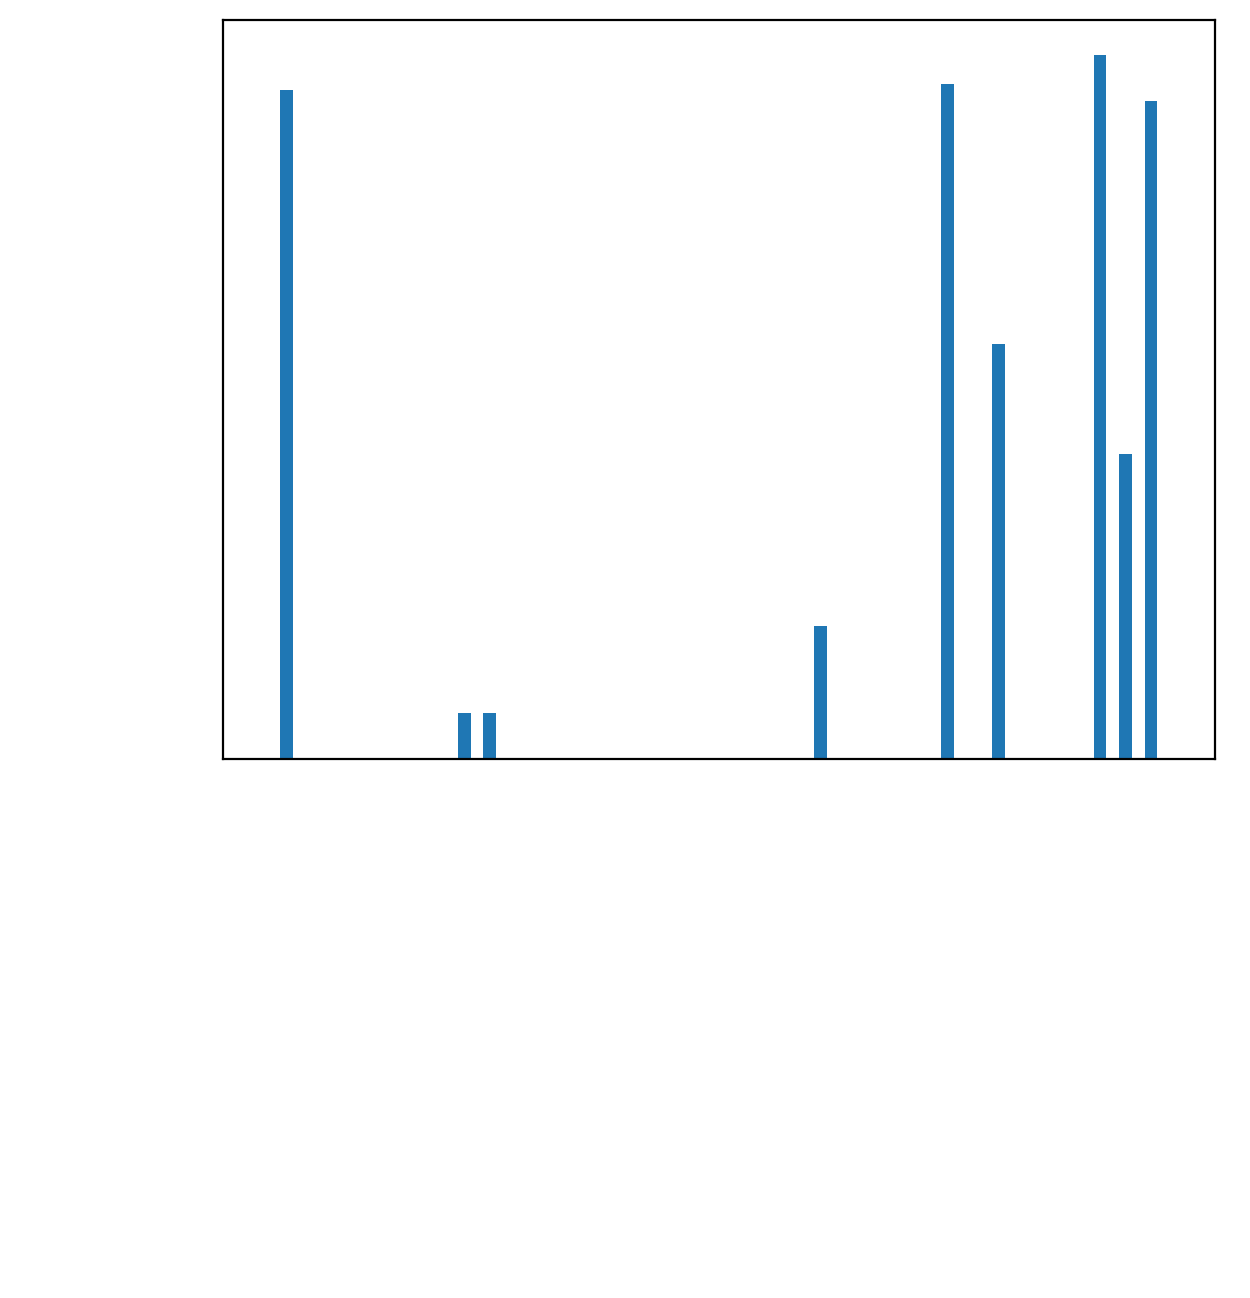

In [505]:
setTick()

# 결측치의 시각화
n.plot.bar()

<AxesSubplot:>

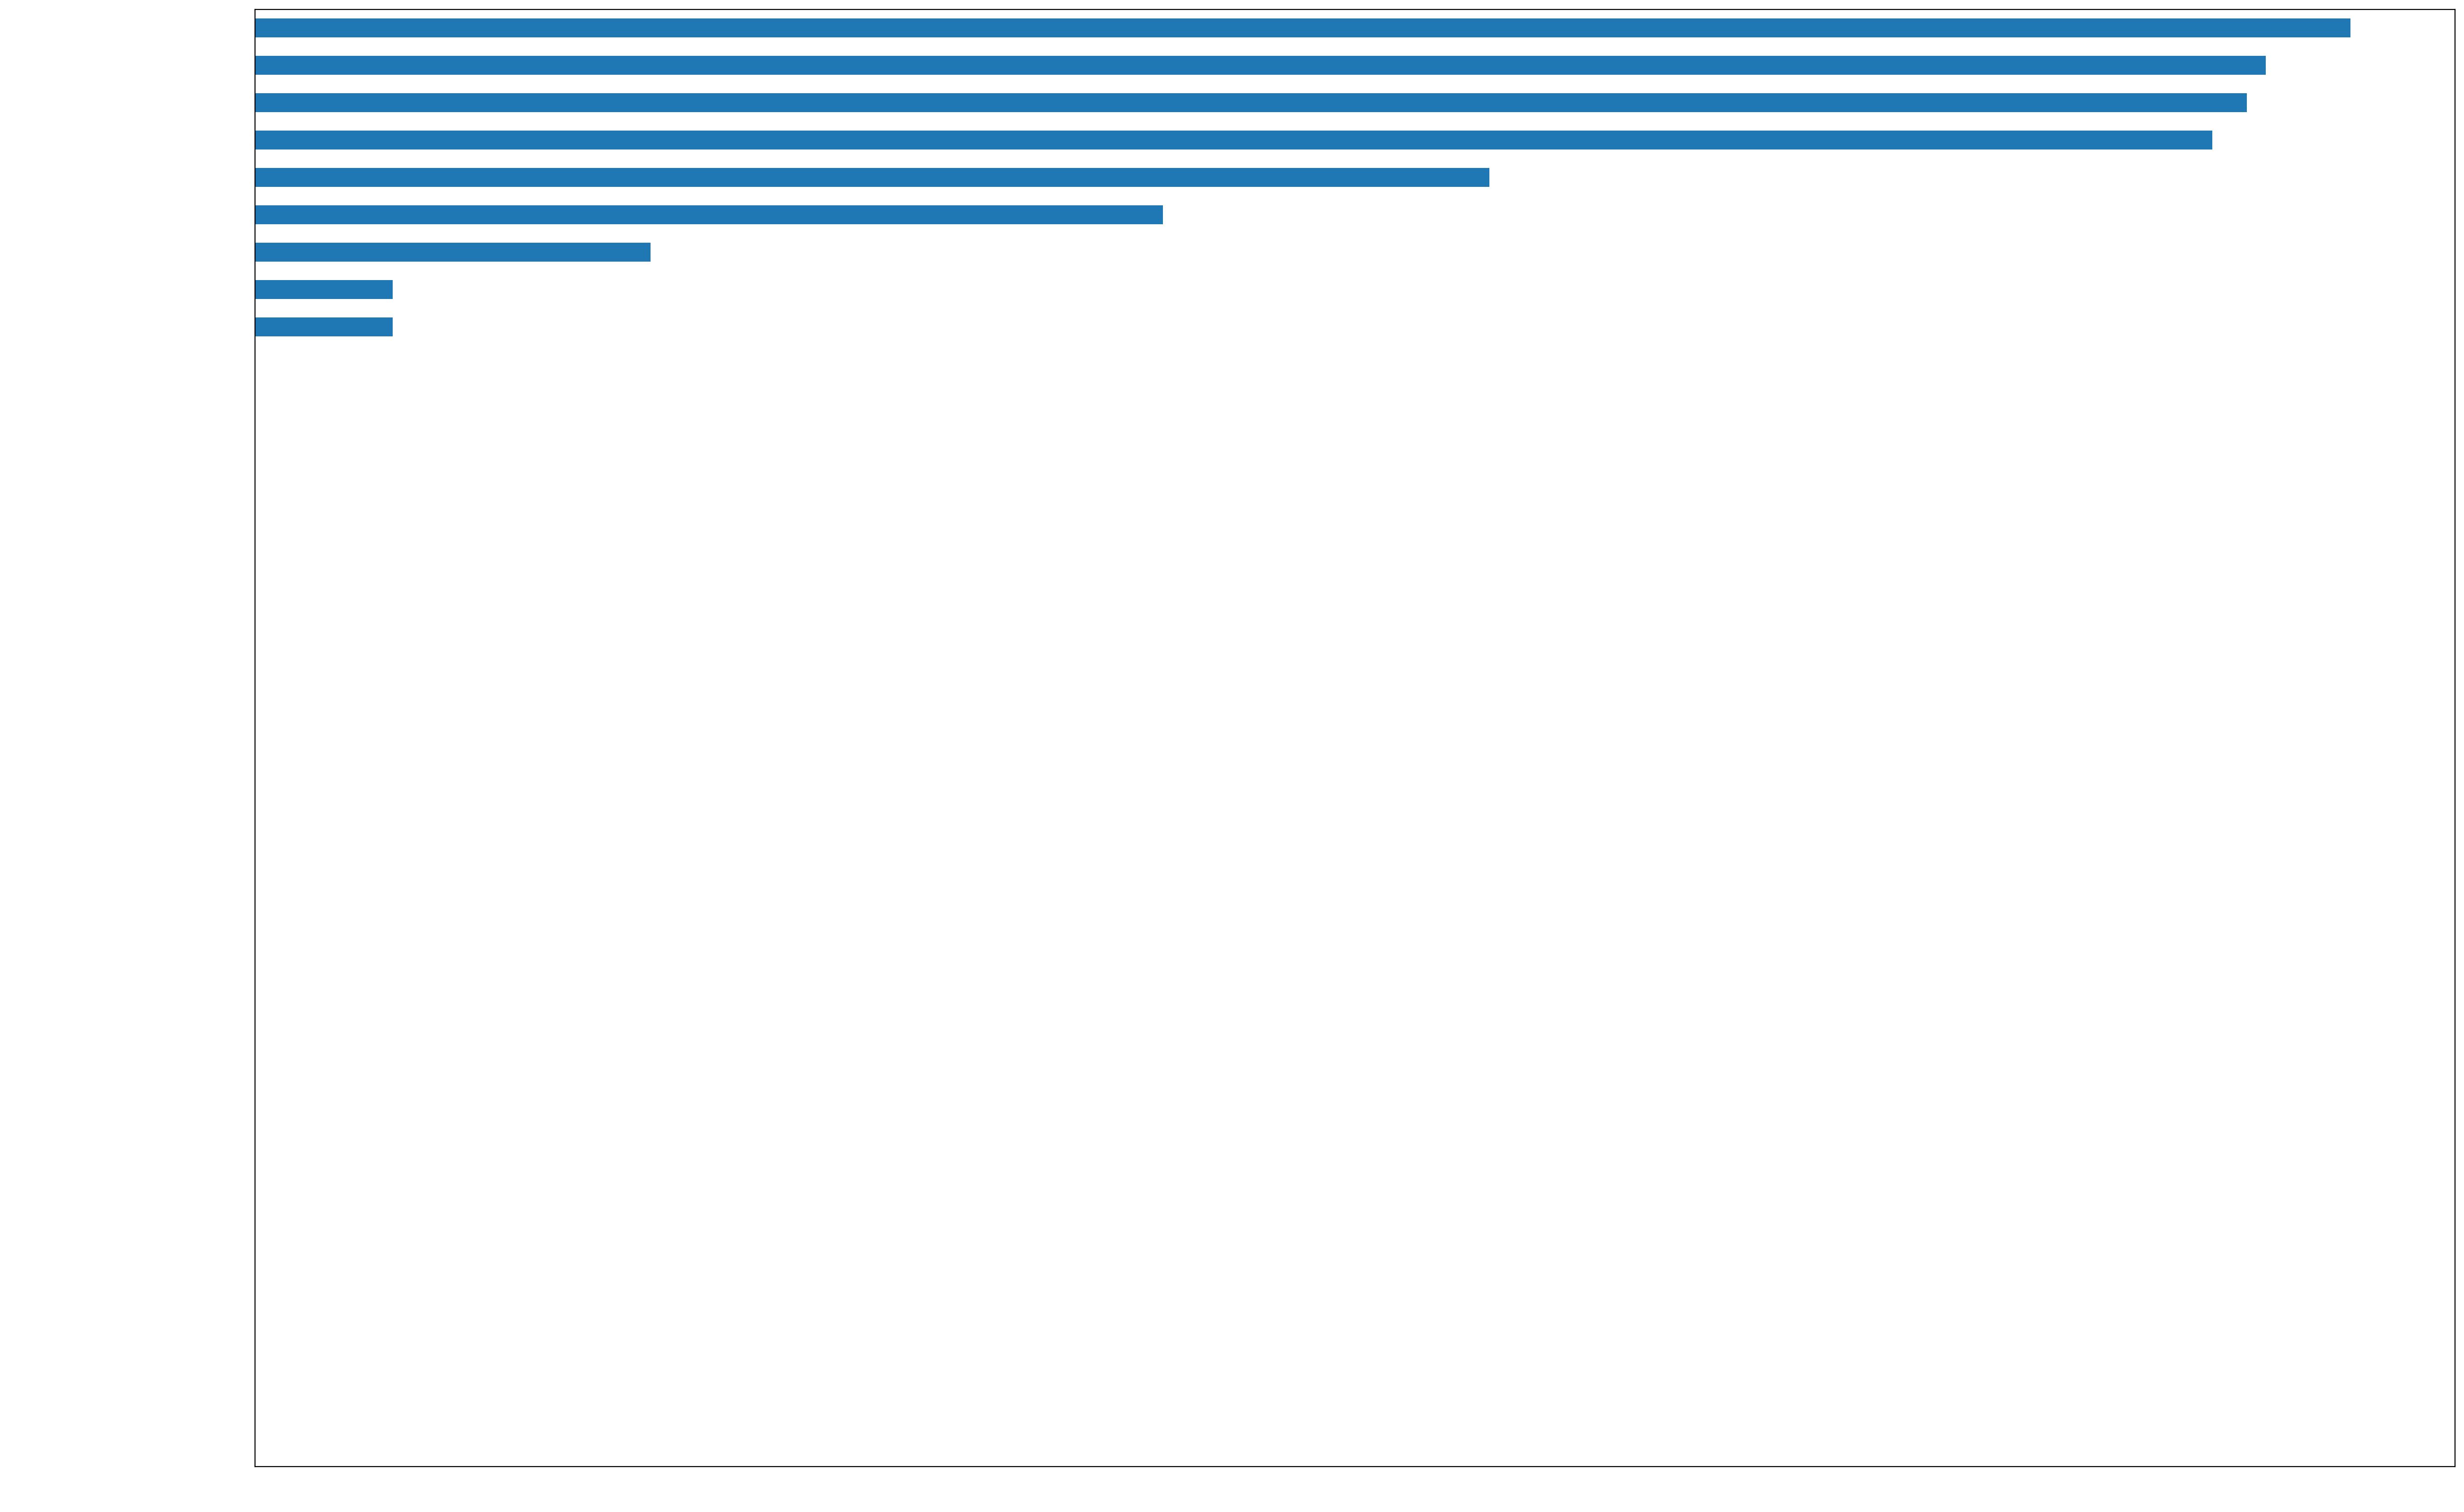

In [506]:
setTick()
# 값을 정렬해서 결측치가 많은 값이 위에 그려지도록 barh로 그립니다.
n.sort_values().plot.barh(figsize=(30, 20))

#### 결측치가 눈에 띄게 많은 컬럼은 제거합니다.
- n.sort_values(ascending=False)로 정렬하고
- 위 아홉개만 골라서 별도의 변수에 저장후
- 그 인덱스 값(컬럼들)으로 삭제합니다.

In [507]:
# sort_values를 통해서 결측치가 많은 데이터 순으로 위에서 9개를 가져오고 저장
not_use = n.sort_values(ascending=False).head(9)
# not_use에 담긴 인덱스 값만 추출해서 not_use_col 변수에 담습니다.
not_use_col = not_use.index
not_use_col

Index(['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

In [508]:
# df를 대상으로 not_use_col에 담긴 컬럼명들로 컬럼을 제거
print(df.shape)
df = df.drop(not_use_col, axis=1)
print(df.shape)

(573680, 39)
(573680, 30)


#### 사용하지 않는 컬럼 제거하기
- df에서 컬럼들만 따로 추출합니다.
- 추출한 컬럼명들 중 컬럼명에 '코드' 또는 '번호'라는 글자가 포함되어 있는 컬럼명만 골라냅니다.
- 골라낸 컬렴명을 이용하여 df에서 컬럼이름으로 제거 합니다.

In [509]:
# 컬럼이름 추출
cols = df.columns
print(cols, type(cols))

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object') <class 'pandas.core.indexes.base.Index'>


In [510]:
# 컬럼명에 '코드', '번호'가 포함된 코드들을 cols_code변수에 담습니다.
cols_code = cols[cols.str.contains("코드|번호")]
cols_code

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [511]:
# "코드", "번호"가 들어가는 컬럼명만 drop으로 제거합니다ㅣ.
# 제거 전 후에 shape을 통해 확인합니다.
print(df.shape)
df = df.drop(cols_code, axis=1)
print(df.shape)

(573680, 30)
(573680, 16)


In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   대지구분명     573680 non-null  object 
 9   지번본번지     573680 non-null  int64  
 10  지번주소      573680 non-null  object 
 11  도로명       573680 non-null  object 
 12  건물본번지     573680 non-null  int64  
 13  도로명주소     573680 non-null  object 
 14  경도        573680 non-null  float64
 15  위도        573680 non-null  float64
dtypes: float64(2), int64(2), object(12)
memory usage: 70.0+ MB


## 행, 열을 기준으로 값 가져오기
---
### 열(column)기준
- df[열이름]
    - 결과가 Pandas의 Series 형태로 반환
- df[[열목록]]: 2개 이상의 열을 가져올 때는 리스트 형태로 묶어서 지정해주어야 합니다.
    - 결과가 Pandas의 DataFrame형태로 반환

In [513]:
df["상호명"].head(3)

0           와라와라호프
1    커피빈코리아선릉로93길점
2             프로포즈
Name: 상호명, dtype: object

In [514]:
df[['상호명', '도로명주소']].head(3)

,상호명,도로명주소
0,와라와라호프,서울특별시 강남구 남부순환로 2933
1,커피빈코리아선릉로93길점,서울특별시 강남구 선릉로93길 6
2,프로포즈,서울특별시 금천구 가산로 34-6


###  행(row)기준
- df.loc[행]
- df.loc[행, 열]
- df.loc[행이름 혹은 번호]
    - 결과가 Pandas의 Series형태로 반환
- df.loc[[행목록]]: 2개 이상의 행을 가져올 때는 열(column)을 가져올 때와 마찬가지로 리스트형태로 묶어서 지정해주어야 합니다.
    - 결과가 Pandas의 DataFrame형태로 반환
    - 1개의 행을 2차원 리스트로 지정할 때에도 DataFrame형태로 반환이 됩니다.

In [515]:
df.loc[0]

상호명                       와라와라호프
상권업종대분류명                      음식
상권업종중분류명                    유흥주점
상권업종소분류명                   호프/맥주
시도명                        서울특별시
시군구명                         강남구
행정동명                        대치1동
법정동명                         대치동
대지구분명                         대지
지번본번지                        604
지번주소           서울특별시 강남구 대치동 604
도로명              서울특별시 강남구 남부순환로
건물본번지                       2933
도로명주소       서울특별시 강남구 남부순환로 2933
경도                    127.061026
위도                     37.493922
Name: 0, dtype: object

In [516]:
df.loc[[0, 1, 2]]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,대지,162,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로,34,서울특별시 금천구 가산로 34-6,126.899220,37.471711


In [517]:
df.loc[[0,1,2], ['상호명', '도로명주소']]

,상호명,도로명주소
0,와라와라호프,서울특별시 강남구 남부순환로 2933
1,커피빈코리아선릉로93길점,서울특별시 강남구 선릉로93길 6
2,프로포즈,서울특별시 금천구 가산로 34-6


### iloc로 슬라이싱을 통해 가져오기
- df.iloc[:] 전체 데이터를 가져옵니다.
- df.iloc[행, 열] 순으로 인덱스 번호를 지정합니다.
- :은 전체를 의미합니다.
- 시작인덱스: 끝나는 인덱스 + 1을 써줍니다.
    - 예) 3:5 3번째 인덱스부터 4번째 인덱스
        - : 에서 앞이나 뒤 인덱스를 써주지 않으면 처음부터 혹은 끝까지를 의미합니다.
    - 예) :5 => 처음부터 4번 인덱스
    - 예) 5: => 5번인덱스부터 끝
    - 예) -5 => 뒤에서 5번째부터 끝
    - 예) :-5 => 처음부터 5번째 전

In [518]:
# 끝에서 5개의 행과, 오른쪽에서 5개의 열을 가져옵니다.
# 뒤에서 다섯번째부터 끝까지
df.iloc[-5:, -5:]

,도로명,건물본번지,도로명주소,경도,위도
573675,서울특별시 마포구 마포대로14길,4,서울특별시 마포구 마포대로14길 4,126.955059,37.548618
573676,서울특별시 성동구 성수일로8길,37,서울특별시 성동구 성수일로8길 37,127.054615,37.545853
573677,서울특별시 강남구 강남대로,492,서울특별시 강남구 강남대로 492,127.024102,37.506202
573678,서울특별시 영등포구 국제금융로,10,서울특별시 영등포구 국제금융로 10,126.924863,37.525172
573679,서울특별시 도봉구 도봉로114길,22,서울특별시 도봉구 도봉로114길 22-8,127.035145,37.647099


In [519]:
# 처음부터 5개의 행과, 처음부터 5개의 열을 가져옵니다.
df.iloc[:5, :5]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시


## 기술 통계 값 보기

### describe로 요약
- describe를 사용하면 데이터를 요약해 볼 수 있습니다.
- 기본적으로 수치형 데이터를 요약해서 보여줍니다.
- include, exclude 옵션으로 데이터 타입에 따른 요약수치를 볼 수 있습니다.
- 데이터의 갯수, 평균, 표준편차, 최솟값, 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값을 볼 수 있습니다.

- DataFrame.count : 결측치를 제외한 수량
- DataFrame.max : 최대값 
- DataFrame.min: 최솟값
- DataFrame.mean : 평균
- quantile 특정 사분위수에 해당하는 값을 반환 (0~1 사이)
    - 0.25 : 1분위 수
    - 0.5 : 2사분위 수(default)
    - 0.75 : 3사분위수
- DataFrame.median : 중간값
- DataFrame.std : 표준편차

In [520]:
df.describe()

,지번본번지,건물본번지,경도,위도
count,573680.000000,573680.000000,573680.000000,573680.000000
mean,469.281810,153.912094,127.596287,36.854698
std,484.778049,276.980935,0.941262,1.081285
min,1.000000,0.000000,126.768169,35.006760
25%,109.000000,20.000000,126.968316,35.215422
50%,335.000000,50.000000,127.047672,37.511207
75%,678.000000,172.000000,128.986938,37.560362
max,9999.000000,3318.000000,129.292243,37.692398


In [521]:
print(df['위도'].count()) # 결측치를 제외한 (NaN이 아닌) 값의 갯수
print(df['위도'].max()) # 최대값
print(df['위도'].quantile(q=0.25)) # 1사분위 수 (25%)
print(df['위도'].quantile()) # 2사분위 수 (50%) == 중앙값
print(df['위도'].var()) # 분산
print(df['위도'].std()) # 표준편차

573680
37.6923983816612
35.2154217343356
37.5112070048312
1.1691762199812672
1.0812845231396162


In [522]:
df.describe(include="object")

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,573679,573680,573680,573680,573680,573680,573680,573680,573680,573680,573680,573680
unique,378758,9,94,709,2,39,629,648,2,190237,18001,190486
top,점프셈교실,음식,한식,한식/백반/한정식,서울특별시,강남구,역삼1동,역삼동,대지,부산광역시 부산진구 부전동 503-15,서울특별시 서초구 신반포로,부산광역시 부산진구 가야대로 772
freq,2297,185516,59725,38133,407376,47080,10400,12102,572913,1058,3543,1058


### Standard Debiation
- 자료의 산포도를 나타내는 수치, 분산의 양의 제곱근으로 정의 또는 계산
- 표준편차가 작을 수록 평균값에서 변량들의 거리가 가깝습니다.
- 통계학과 확률에서 주로 확률의 분포, 확률변수의 혹은 측정된 인구나 중복집합을 나타냅니다.
- 편차는 관측값에서 평균 또는 중앙값을 뺀것입니다.
- 분산은 관측값에서 평균을 뺀값에 제곱을 하고 그것을 모두 더한 후 갯수로 나눠 계산
- 차이값의 제곱의 평균
- 관측값의 평균을 뺀값을 모두 더하면 결과가 0이되므로 제곱해서 더함
- 제곱해서 값이 부풀려진 분산은 제곱근을 구하여 표준편차로 만들고 사용

In [523]:
import numpy as np
print(np.sqrt(df["위도"].var()))
print(df["위도"].std())

1.0812845231396162
1.0812845231396162


### 단변량 수치형 변수 표현


In [524]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\users\java01\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='위도', ylabel='Density'>

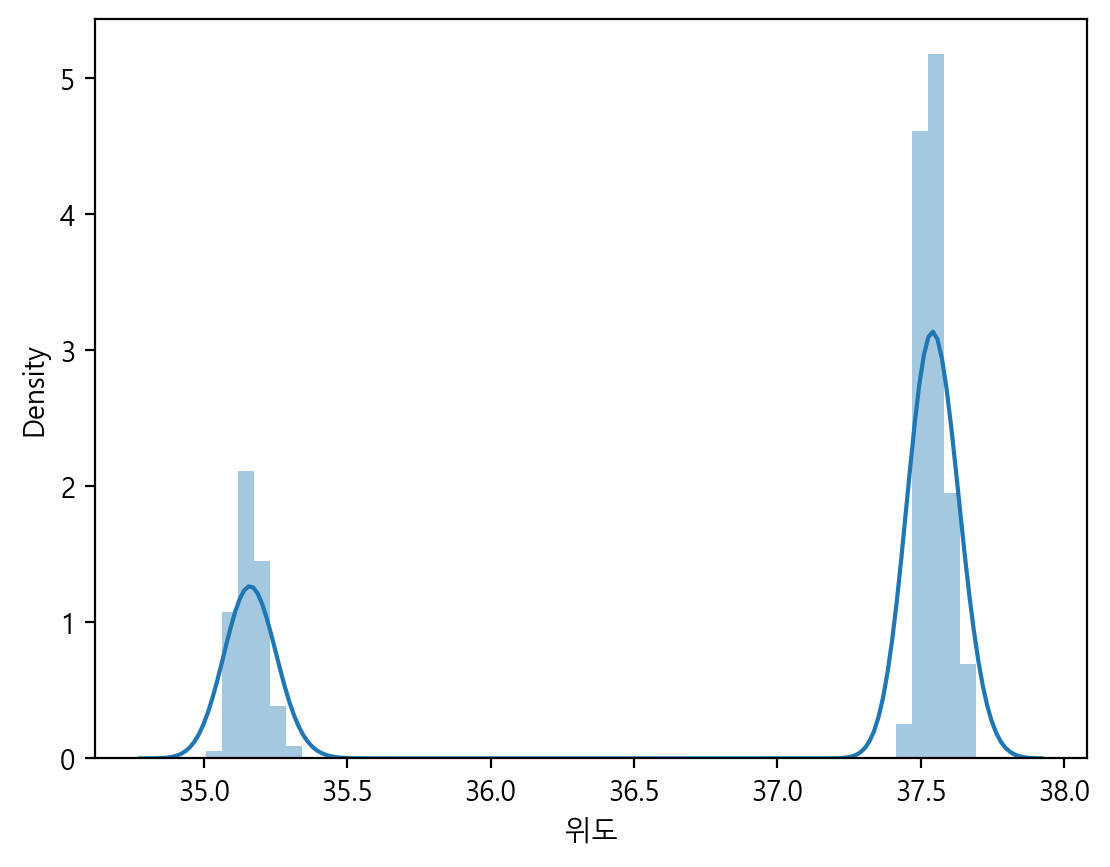

In [525]:
# 위도
# distplot : hist 차트, kde 차트(변화량 곡선)을 한곳에 표현
sns.distplot(df["위도"])

### 스캐터 플럿으로 이변량 표현

<AxesSubplot:xlabel='경도', ylabel='위도'>

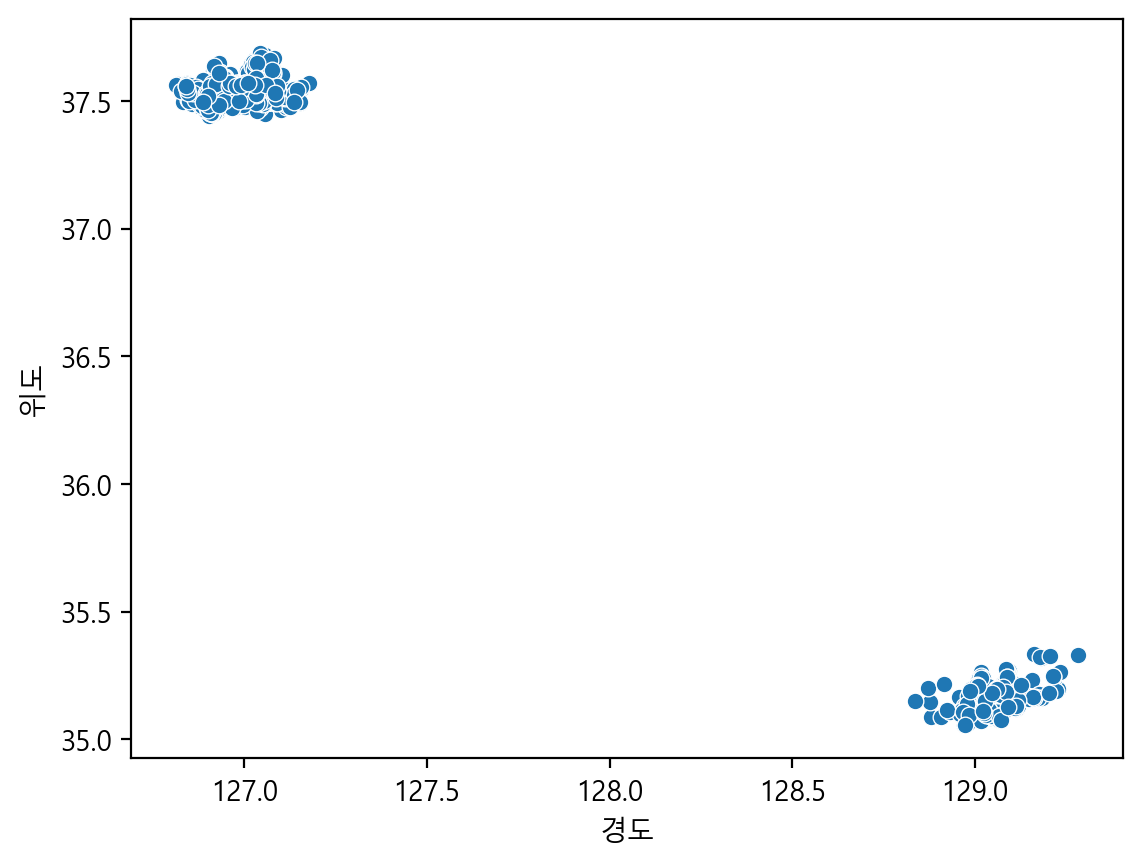

In [526]:
# scatterplot으로 경도와 위도를 표현하며
# 데이터의 갯수가 많으면 오래 걸리기 때문에 1000개의 샘플을 추출해서 그립니다.
sns.scatterplot(data=df.sample(1000), x="경도", y="위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

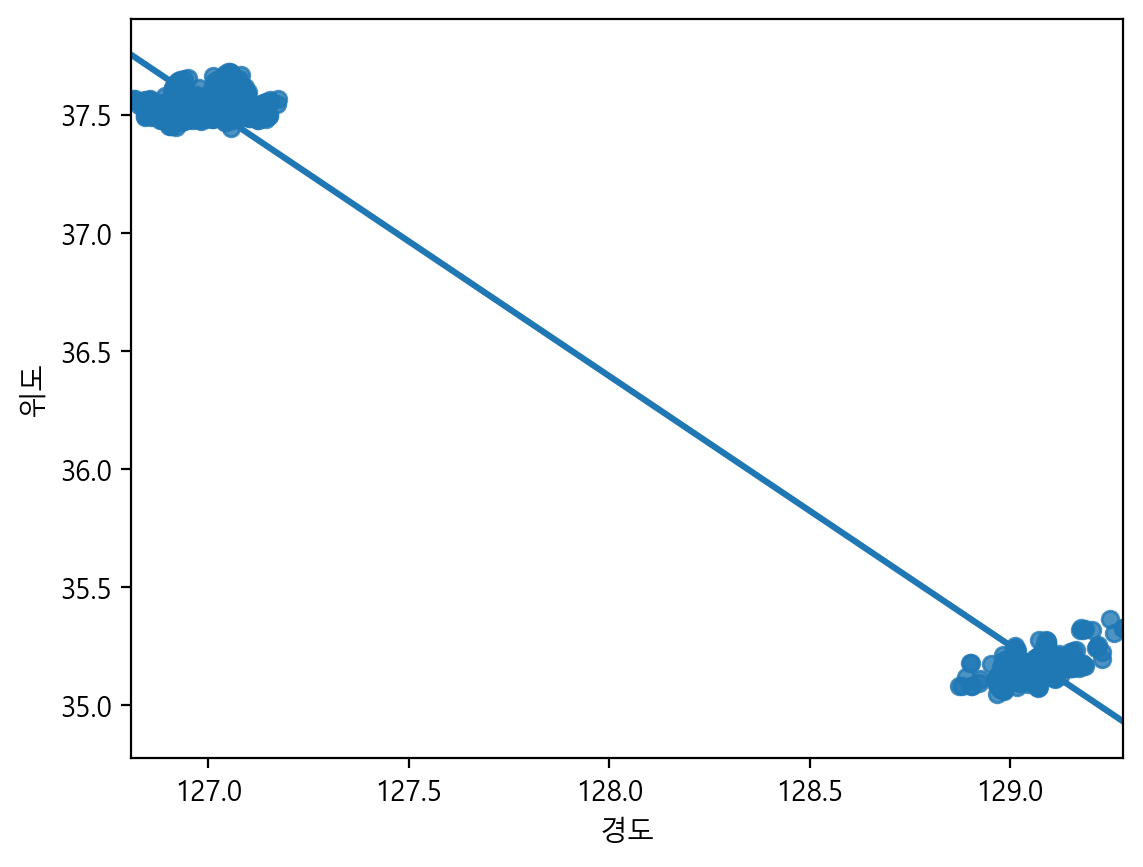

In [527]:
# 위 시각화에서 회귀선을 그립니다.
sns.regplot(data=df.sample(1000), x="경도", y="위도")

### 상관계수
- r값은 X와 Y가 완전히 동일하면 +1, 전혀 다르면0, 반대방향으로 완전히 동일하면 -1을 가진다
- 결정계수(coefficient of determination)은 r ** 2 로 계산하며 이것은 X로부터 Y를 예측할 수 있는 정도를 의미한다
    - r이 -1.0과 -0.7사이이면, 강한 음적 선형관계.
    - r이 -0.7과 -0.3사이이면, 뚜렷한 음적 선형관계
    - r이 -0.3과 -0.1사이이면, 약한 음적 선형관계
    - r이 -0.1과 +0.1사이이면, 거의 무시될 수 있는 선형관계
    - r이 +0.1과 +0.3사이이면, 약한 양적 선형관계
    - r이 +0.3과 +0.7사이이면, 뚜렷한 양적 선형관계
    - r이 +0.7과 +1.0사이이면, 강한 양적 선형관계


## 지역별 업종별 상권의 분포

In [528]:
df.describe(include="object")

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,573679,573680,573680,573680,573680,573680,573680,573680,573680,573680,573680,573680
unique,378758,9,94,709,2,39,629,648,2,190237,18001,190486
top,점프셈교실,음식,한식,한식/백반/한정식,서울특별시,강남구,역삼1동,역삼동,대지,부산광역시 부산진구 부전동 503-15,서울특별시 서초구 신반포로,부산광역시 부산진구 가야대로 772
freq,2297,185516,59725,38133,407376,47080,10400,12102,572913,1058,3543,1058


In [529]:
# 상권 업종 대분류명의 unique값을 봅니다.
df["상권업종대분류명"].unique()

array(['음식', '생활서비스', '소매', '의료', '학문/교육', '관광/여가/오락', '부동산', '숙박', '스포츠'],
      dtype=object)

In [530]:
# value_counts로 상권업종대분류명의 빈도수를 구합니다.
df["상권업종대분류명"].value_counts()

음식          185516
소매          179460
생활서비스        97789
학문/교육        42477
의료           25509
부동산          20918
관광/여가/오락     16377
숙박            5327
스포츠            307
Name: 상권업종대분류명, dtype: int64

### 강남구의 상권업종대분류가 음식인 상점의 상호명과 상권업종중분명을 화면에 표시(필터링)

In [531]:
df[(df['상권업종대분류명'] == '음식') & (df['시군구명'] == '강남구')][['상호명', '상권업종소분류명']]

,상호명,상권업종소분류명
0,와라와라호프,호프/맥주
1,커피빈코리아선릉로93길점,커피전문점/카페/다방
26,쉼터,라면김밥분식
27,배제현의웰빙낙지한마리수제비,낙지/오징어
39,마깐바냑,라면김밥분식
...,...,...
573504,강남농수산,음식점-일식
573521,풍,음식점-일식
573545,올드캡,패스트푸드
573554,흑화당,커피전문점/카페/다방


### 강남구의 상권업종대분류가 음식인 상점의 중분류명을 종류별 갯수로 표시하세요

In [532]:
df[(df['상권업종대분류명'] == '음식') & (df['시군구명'] == '강남구')][['상권업종소분류명']].value_counts()

상권업종소분류명   
한식/백반/한정식      3151
커피전문점/카페/다방    2727
정통양식/경양식       1213
라면김밥분식          754
호프/맥주           589
               ... 
고기부페              1
돌구이요리전문           1
옻닭전문              1
재첩국전문             1
생과자점              1
Length: 107, dtype: int64

### '시도명'이 서울특별시' & '상권업종대분류명' 음식

In [533]:
df_seoul_food = df[(df['시도명'] == '서울특별시') & (df['상권업종대분류명'] == '음식')]

In [534]:
foodByGu = df_seoul_food.groupby(by=['시군구명', '상권업종중분류명'])['상호명'].count()
foodByGu

시군구명  상권업종중분류명
강남구   기타음식업         47
      닭/오리요리       539
      별식/퓨전요리      341
      부페            63
      분식          1197
                  ... 
중랑구   제과제빵떡케익      160
      중식            78
      커피점/카페       311
      패스트푸드        127
      한식          1251
Name: 상호명, Length: 348, dtype: int64

In [535]:
foodByGu.unstack() # 행기준으로 그룹 항목이 모두 구성된 내용을 행과 열로 각 항목을 구분하여 표시

상권업종중분류명,기타음식업,닭/오리요리,별식/퓨전요리,부페,분식,양식,유흥주점,음식배달서비스,일식/수산물,제과제빵떡케익,중식,커피점/카페,패스트푸드,한식
시군구명,,,,,,,,,,,,,,
강남구,47.0,539.0,341.0,63.0,1197.0,1573.0,1573.0,11.0,1255.0,650.0,358.0,2790.0,786.0,4371.0
강동구,4.0,318.0,138.0,24.0,509.0,154.0,737.0,4.0,379.0,223.0,93.0,584.0,224.0,1636.0
강북구,2.0,208.0,97.0,6.0,329.0,63.0,475.0,4.0,203.0,134.0,55.0,259.0,123.0,1209.0
강서구,16.0,323.0,145.0,21.0,531.0,260.0,869.0,2.0,441.0,256.0,126.0,765.0,259.0,1753.0
관악구,11.0,324.0,118.0,11.0,461.0,183.0,790.0,6.0,324.0,165.0,109.0,516.0,196.0,1336.0
광진구,11.0,453.0,188.0,25.0,655.0,275.0,1142.0,1.0,490.0,270.0,194.0,810.0,278.0,2020.0
구로구,6.0,289.0,121.0,23.0,429.0,97.0,691.0,6.0,282.0,169.0,226.0,551.0,180.0,1322.0
금천구,9.0,176.0,102.0,9.0,268.0,75.0,413.0,1.0,225.0,94.0,93.0,369.0,100.0,1003.0
노원구,10.0,345.0,99.0,12.0,476.0,132.0,482.0,6.0,300.0,239.0,95.0,547.0,259.0,1227.0


In [536]:
foodByGu.unstack().loc['강남구']

상권업종중분류명
기타음식업        47.0
닭/오리요리      539.0
별식/퓨전요리     341.0
부페           63.0
분식         1197.0
양식         1573.0
유흥주점       1573.0
음식배달서비스      11.0
일식/수산물     1255.0
제과제빵떡케익     650.0
중식          358.0
커피점/카페     2790.0
패스트푸드       786.0
한식         4371.0
Name: 강남구, dtype: float64

<AxesSubplot:xlabel='상권업종중분류명'>

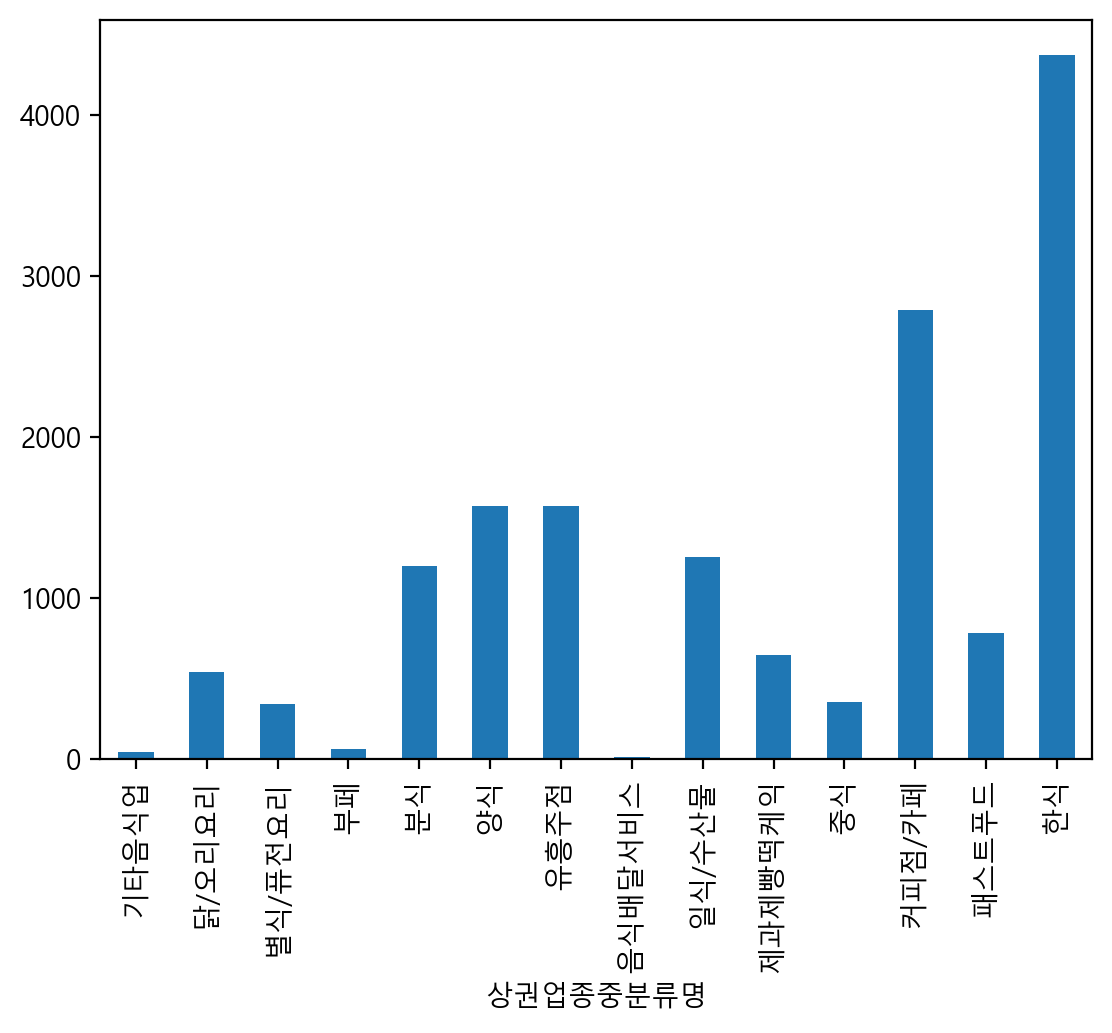

In [537]:
foodByGu.unstack().loc['강남구'].plot.bar()

In [538]:
food = df_seoul_food.groupby(by=['시군구명', '상권업종중분류명'])['상호명'].count()
food = food.reset_index()
food.rename(columns={'상호명':'상호수'}, inplace=True)
food

,시군구명,상권업종중분류명,상호수
0,강남구,기타음식업,47
1,강남구,닭/오리요리,539
2,강남구,별식/퓨전요리,341
3,강남구,부페,63
4,강남구,분식,1197
...,...,...,...
343,중랑구,제과제빵떡케익,160
344,중랑구,중식,78
345,중랑구,커피점/카페,311
346,중랑구,패스트푸드,127


<AxesSubplot:xlabel='상권업종중분류명', ylabel='상호수'>

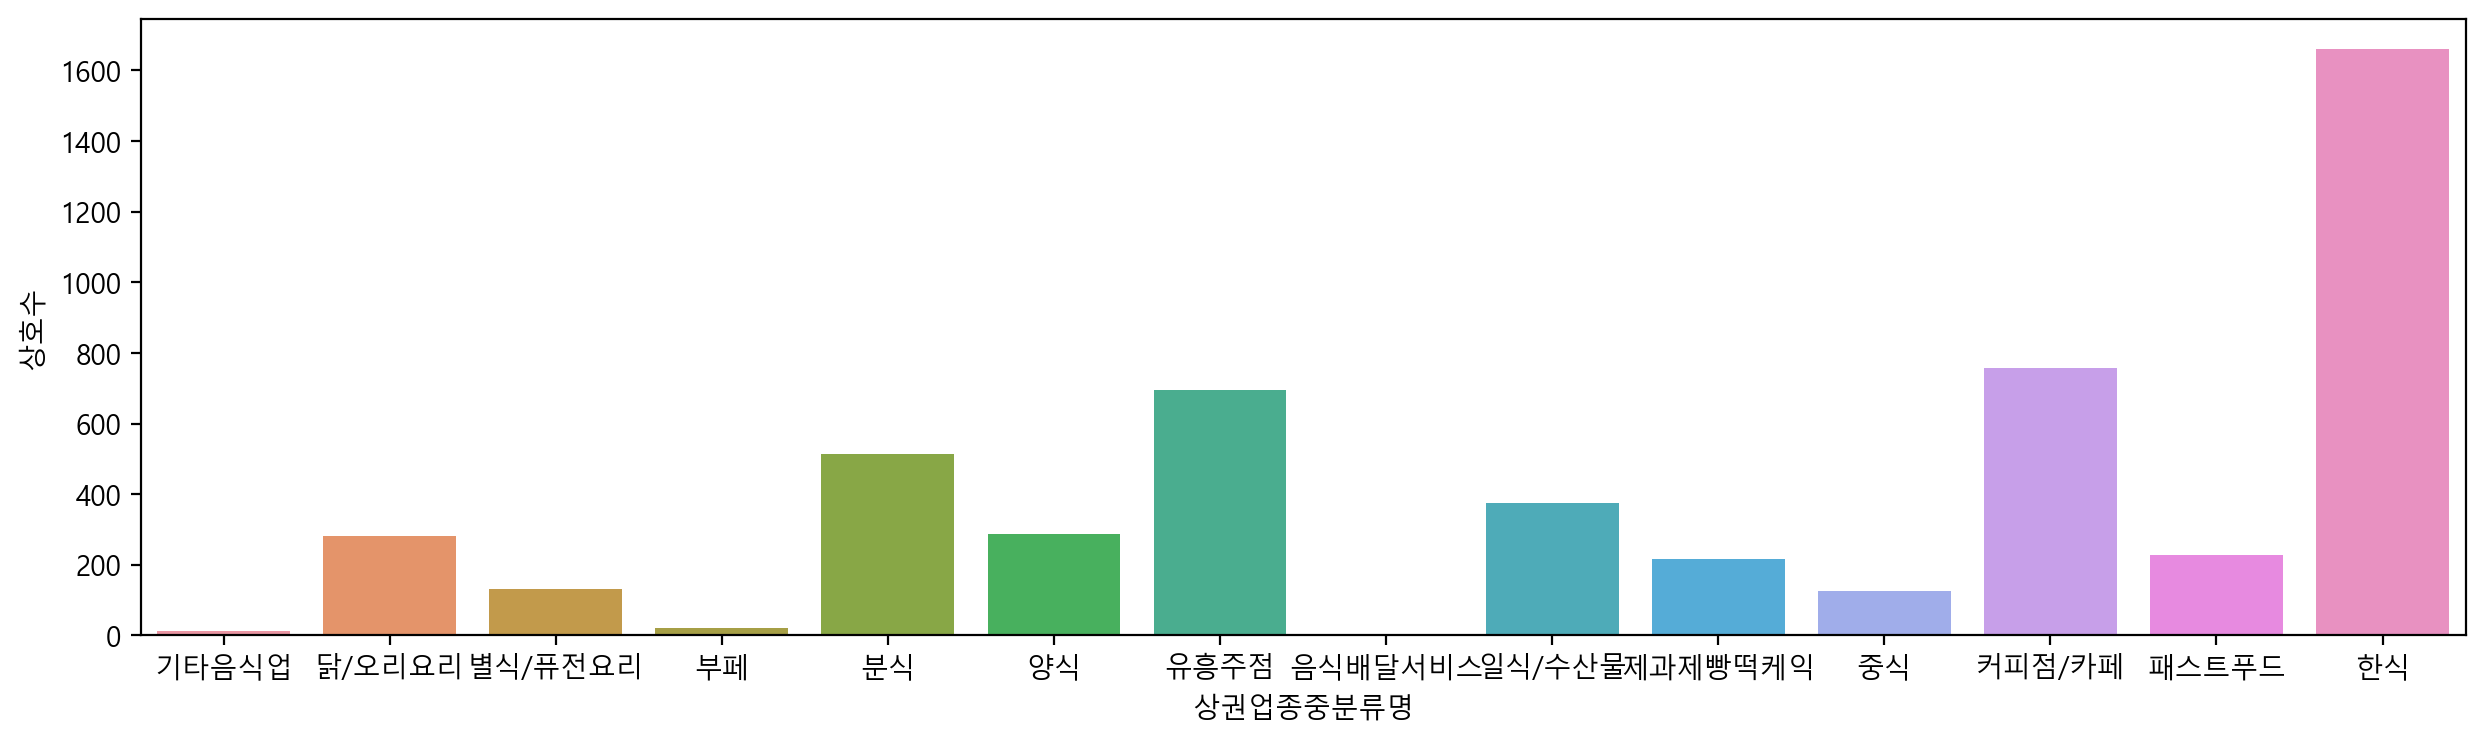

In [539]:
plt.figure(figsize=(15, 4))
sns.barplot(data=food, x='상권업종중분류명', y='상호수', ci=False)
# 오차막대(ci) : Seaborn의 barplot은 기본형태로 막대 그래프와
# 오차막대(위쪽 검은 선)을 같이 표시합니다.
# 평균, 중앙값, 최빈값 등과 함께 고려하여 계산한 막대이며, 특정 값으로 내용을 수정할 수 있습니다.
# ci = "st"라는 속성을 지정하면 오차막대는 표준편차를 표시합니다.
# ci=False는 오차막대를 화면에서 사라지게 합니다.

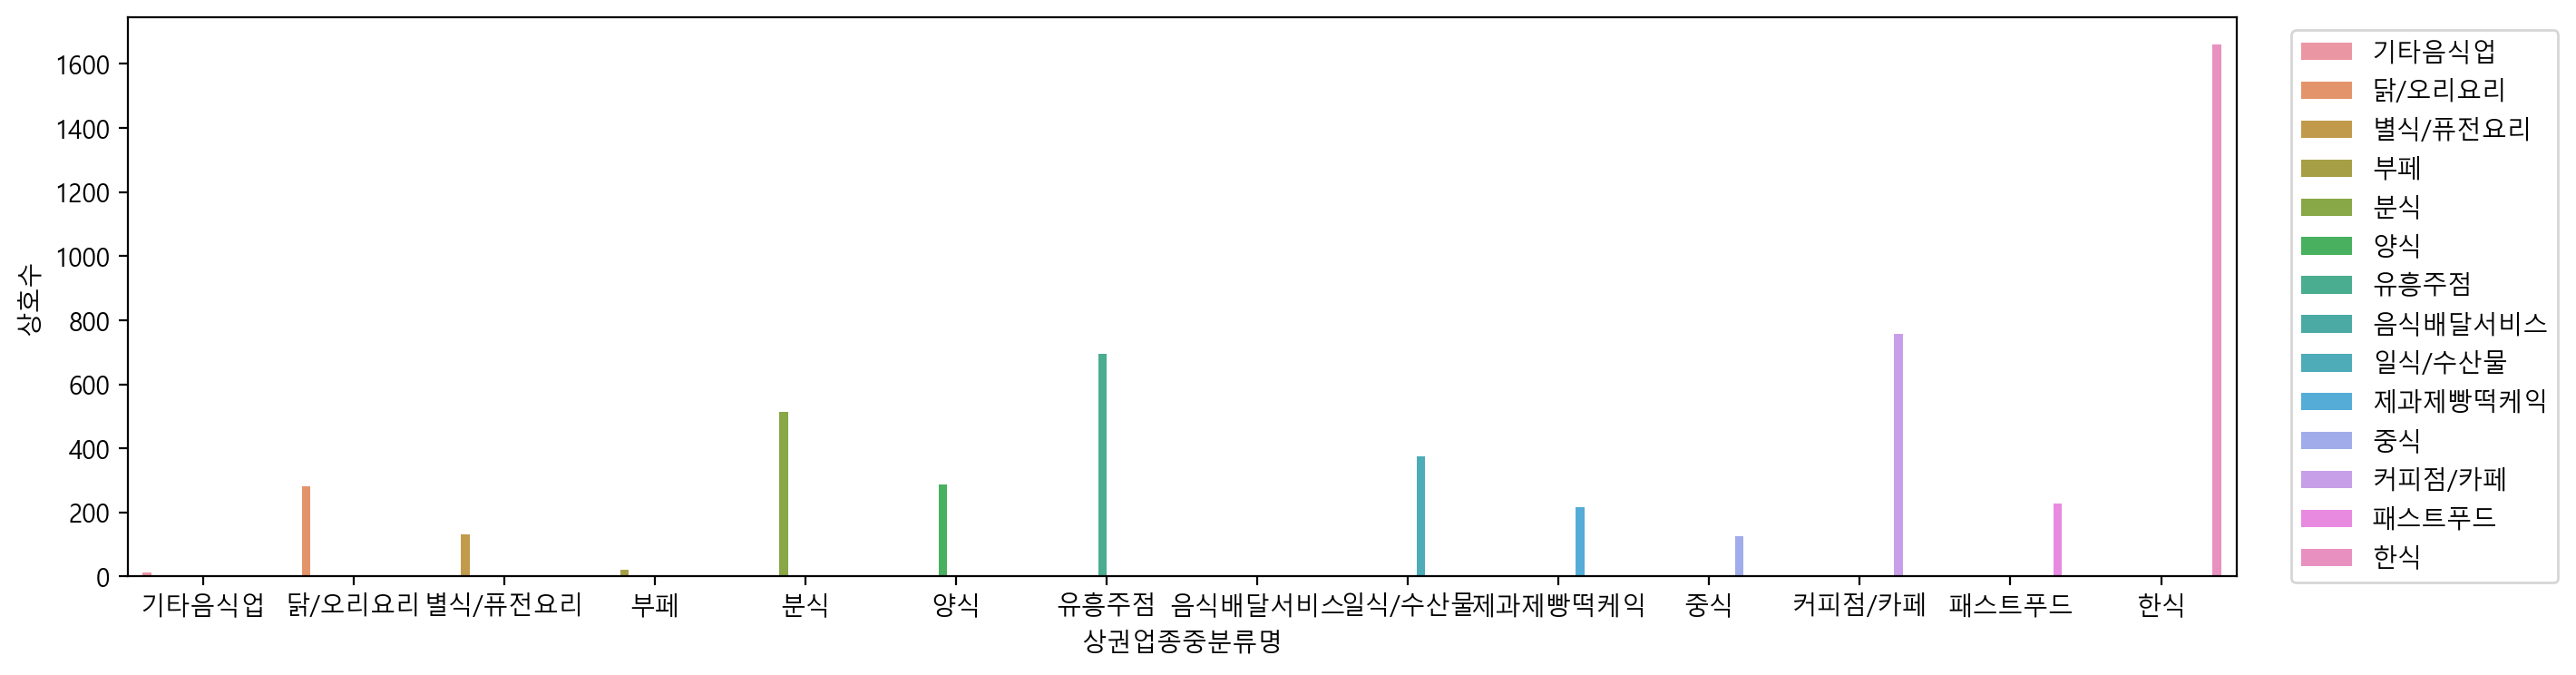

In [540]:
plt.figure(figsize=(15, 4))
sns.barplot(data=food, x='상권업종중분류명', y='상호수', ci=False, hue="상권업종중분류명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)

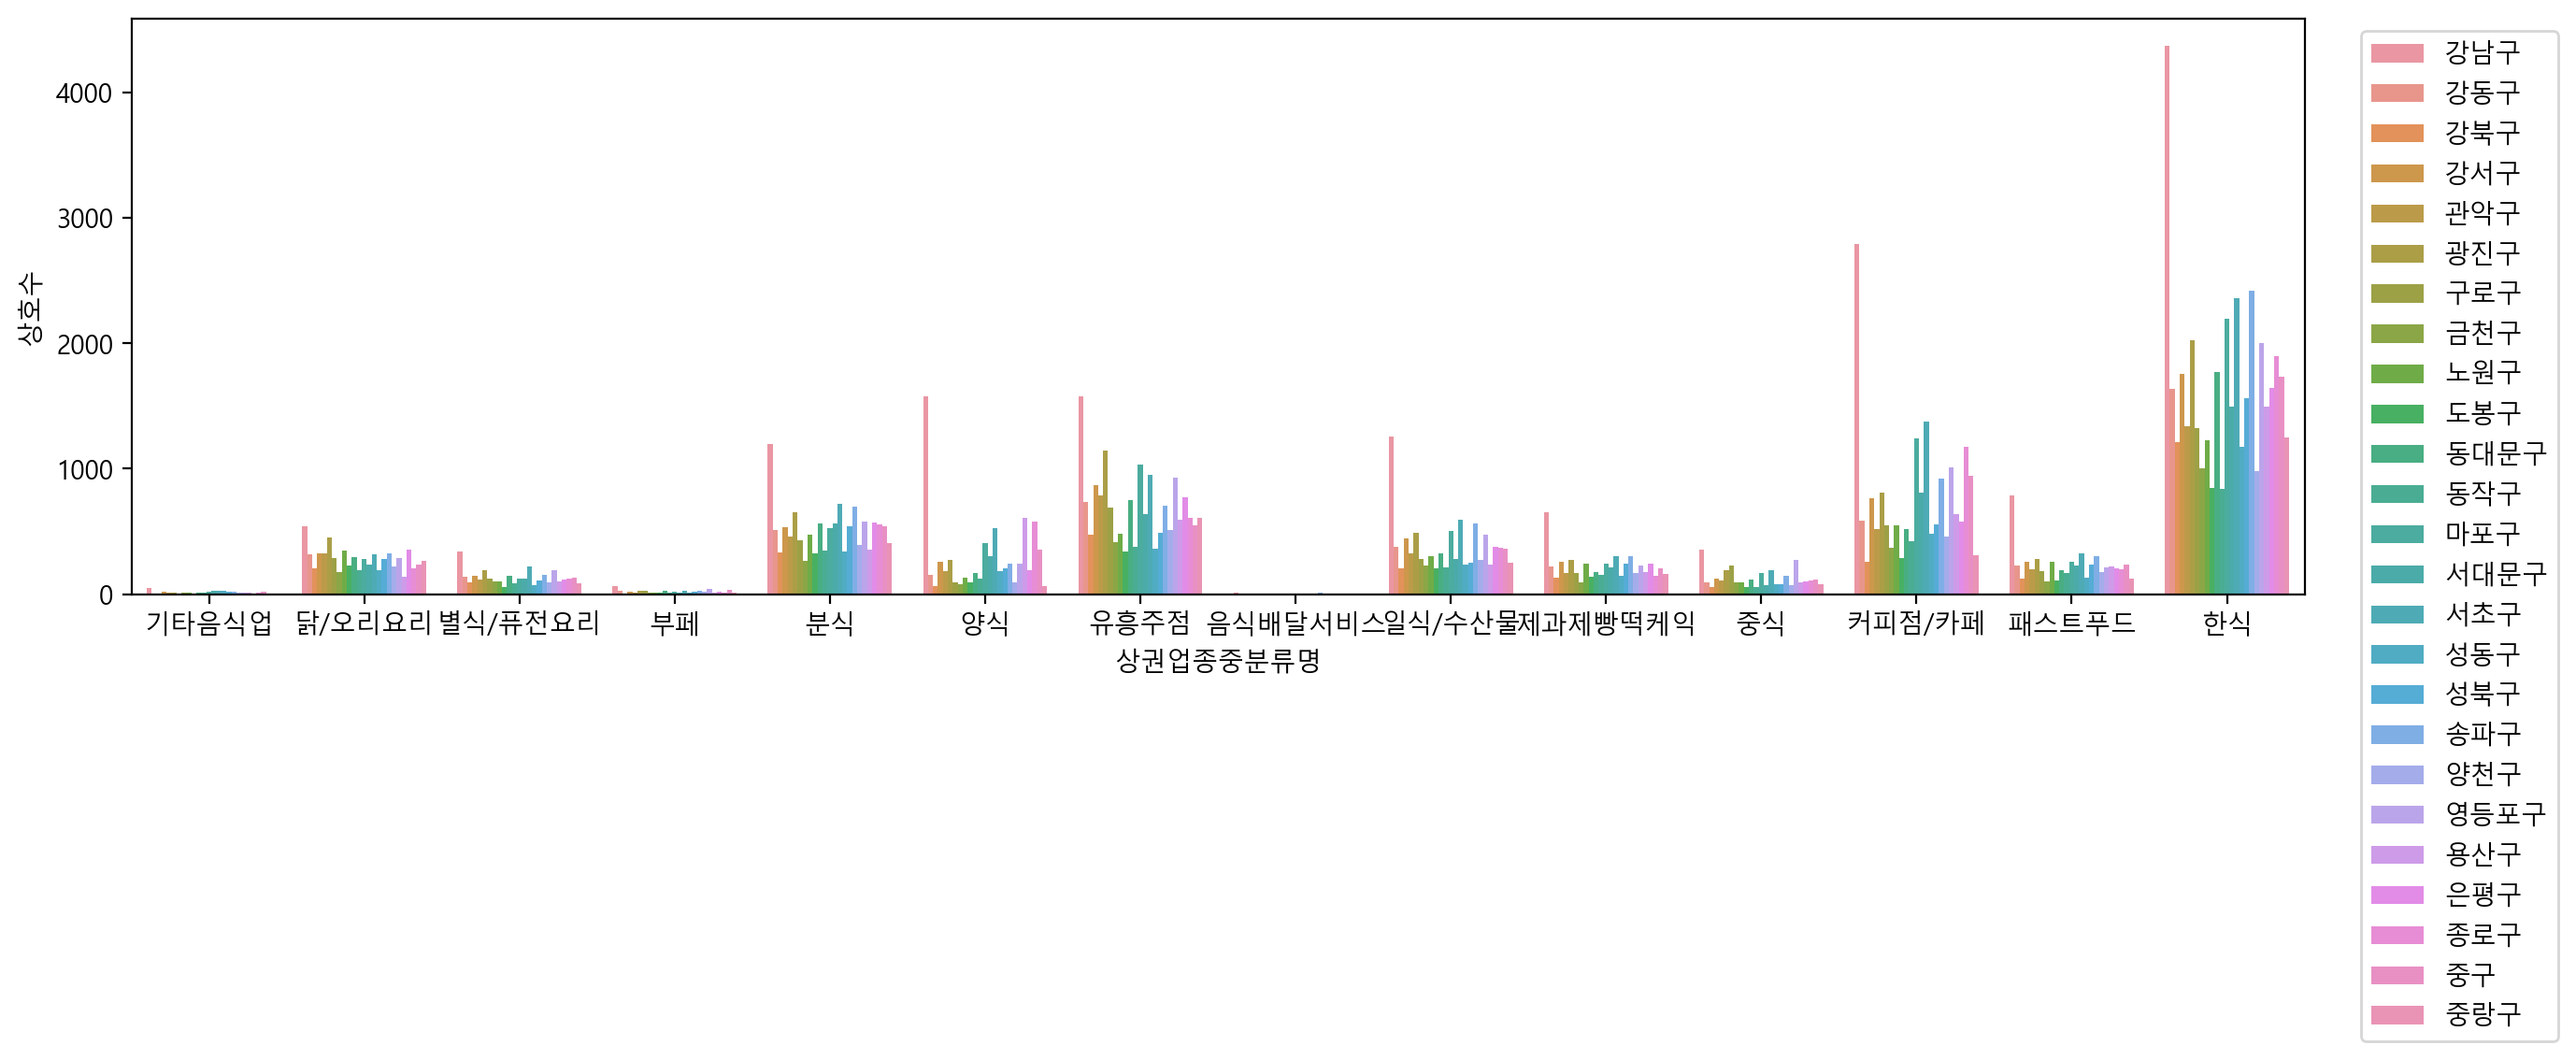

In [541]:
plt.figure(figsize=(15, 4))
sns.barplot(data=food, x='상권업종중분류명', y='상호수', ci=False, hue="시군구명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)

## 한눈에 들어오지않는 그래프 ( 해결법 : 서브플랏으로 나눠 여러개의 차트를 표시)

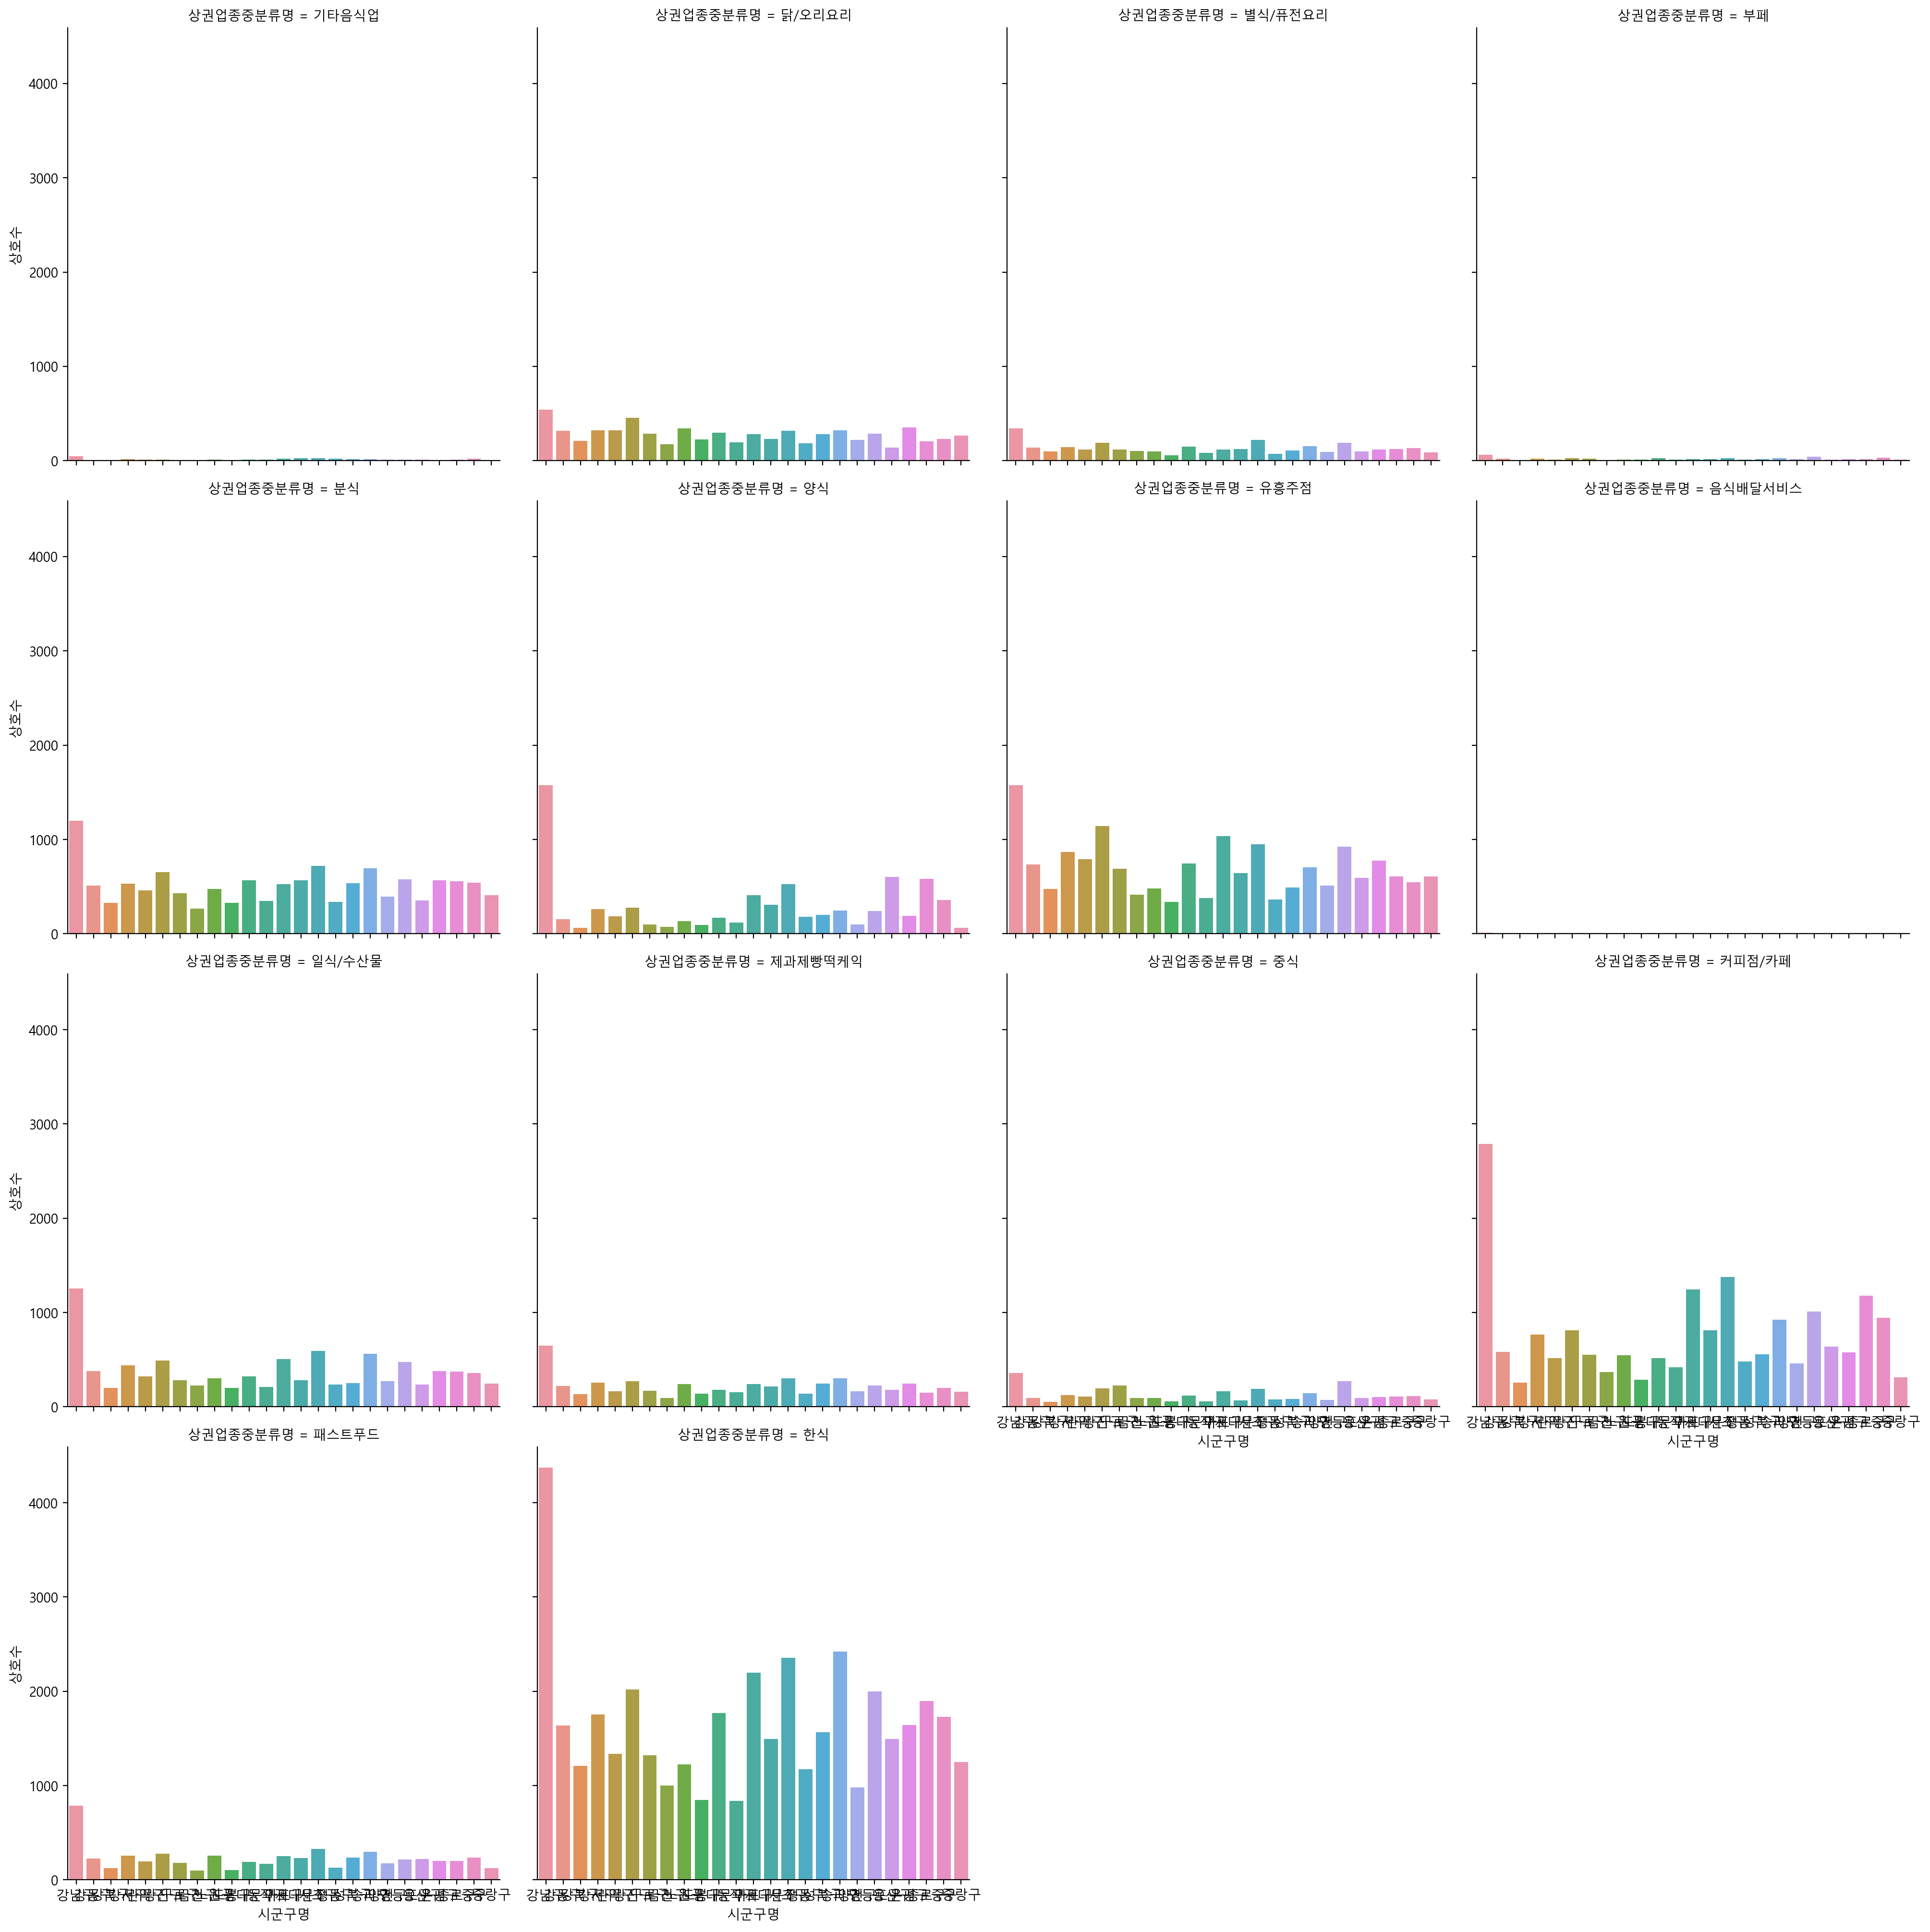

In [542]:
sns.catplot(data=food, x='시군구명', y='상호수', kind='bar', col='상권업종중분류명', col_wrap=4)

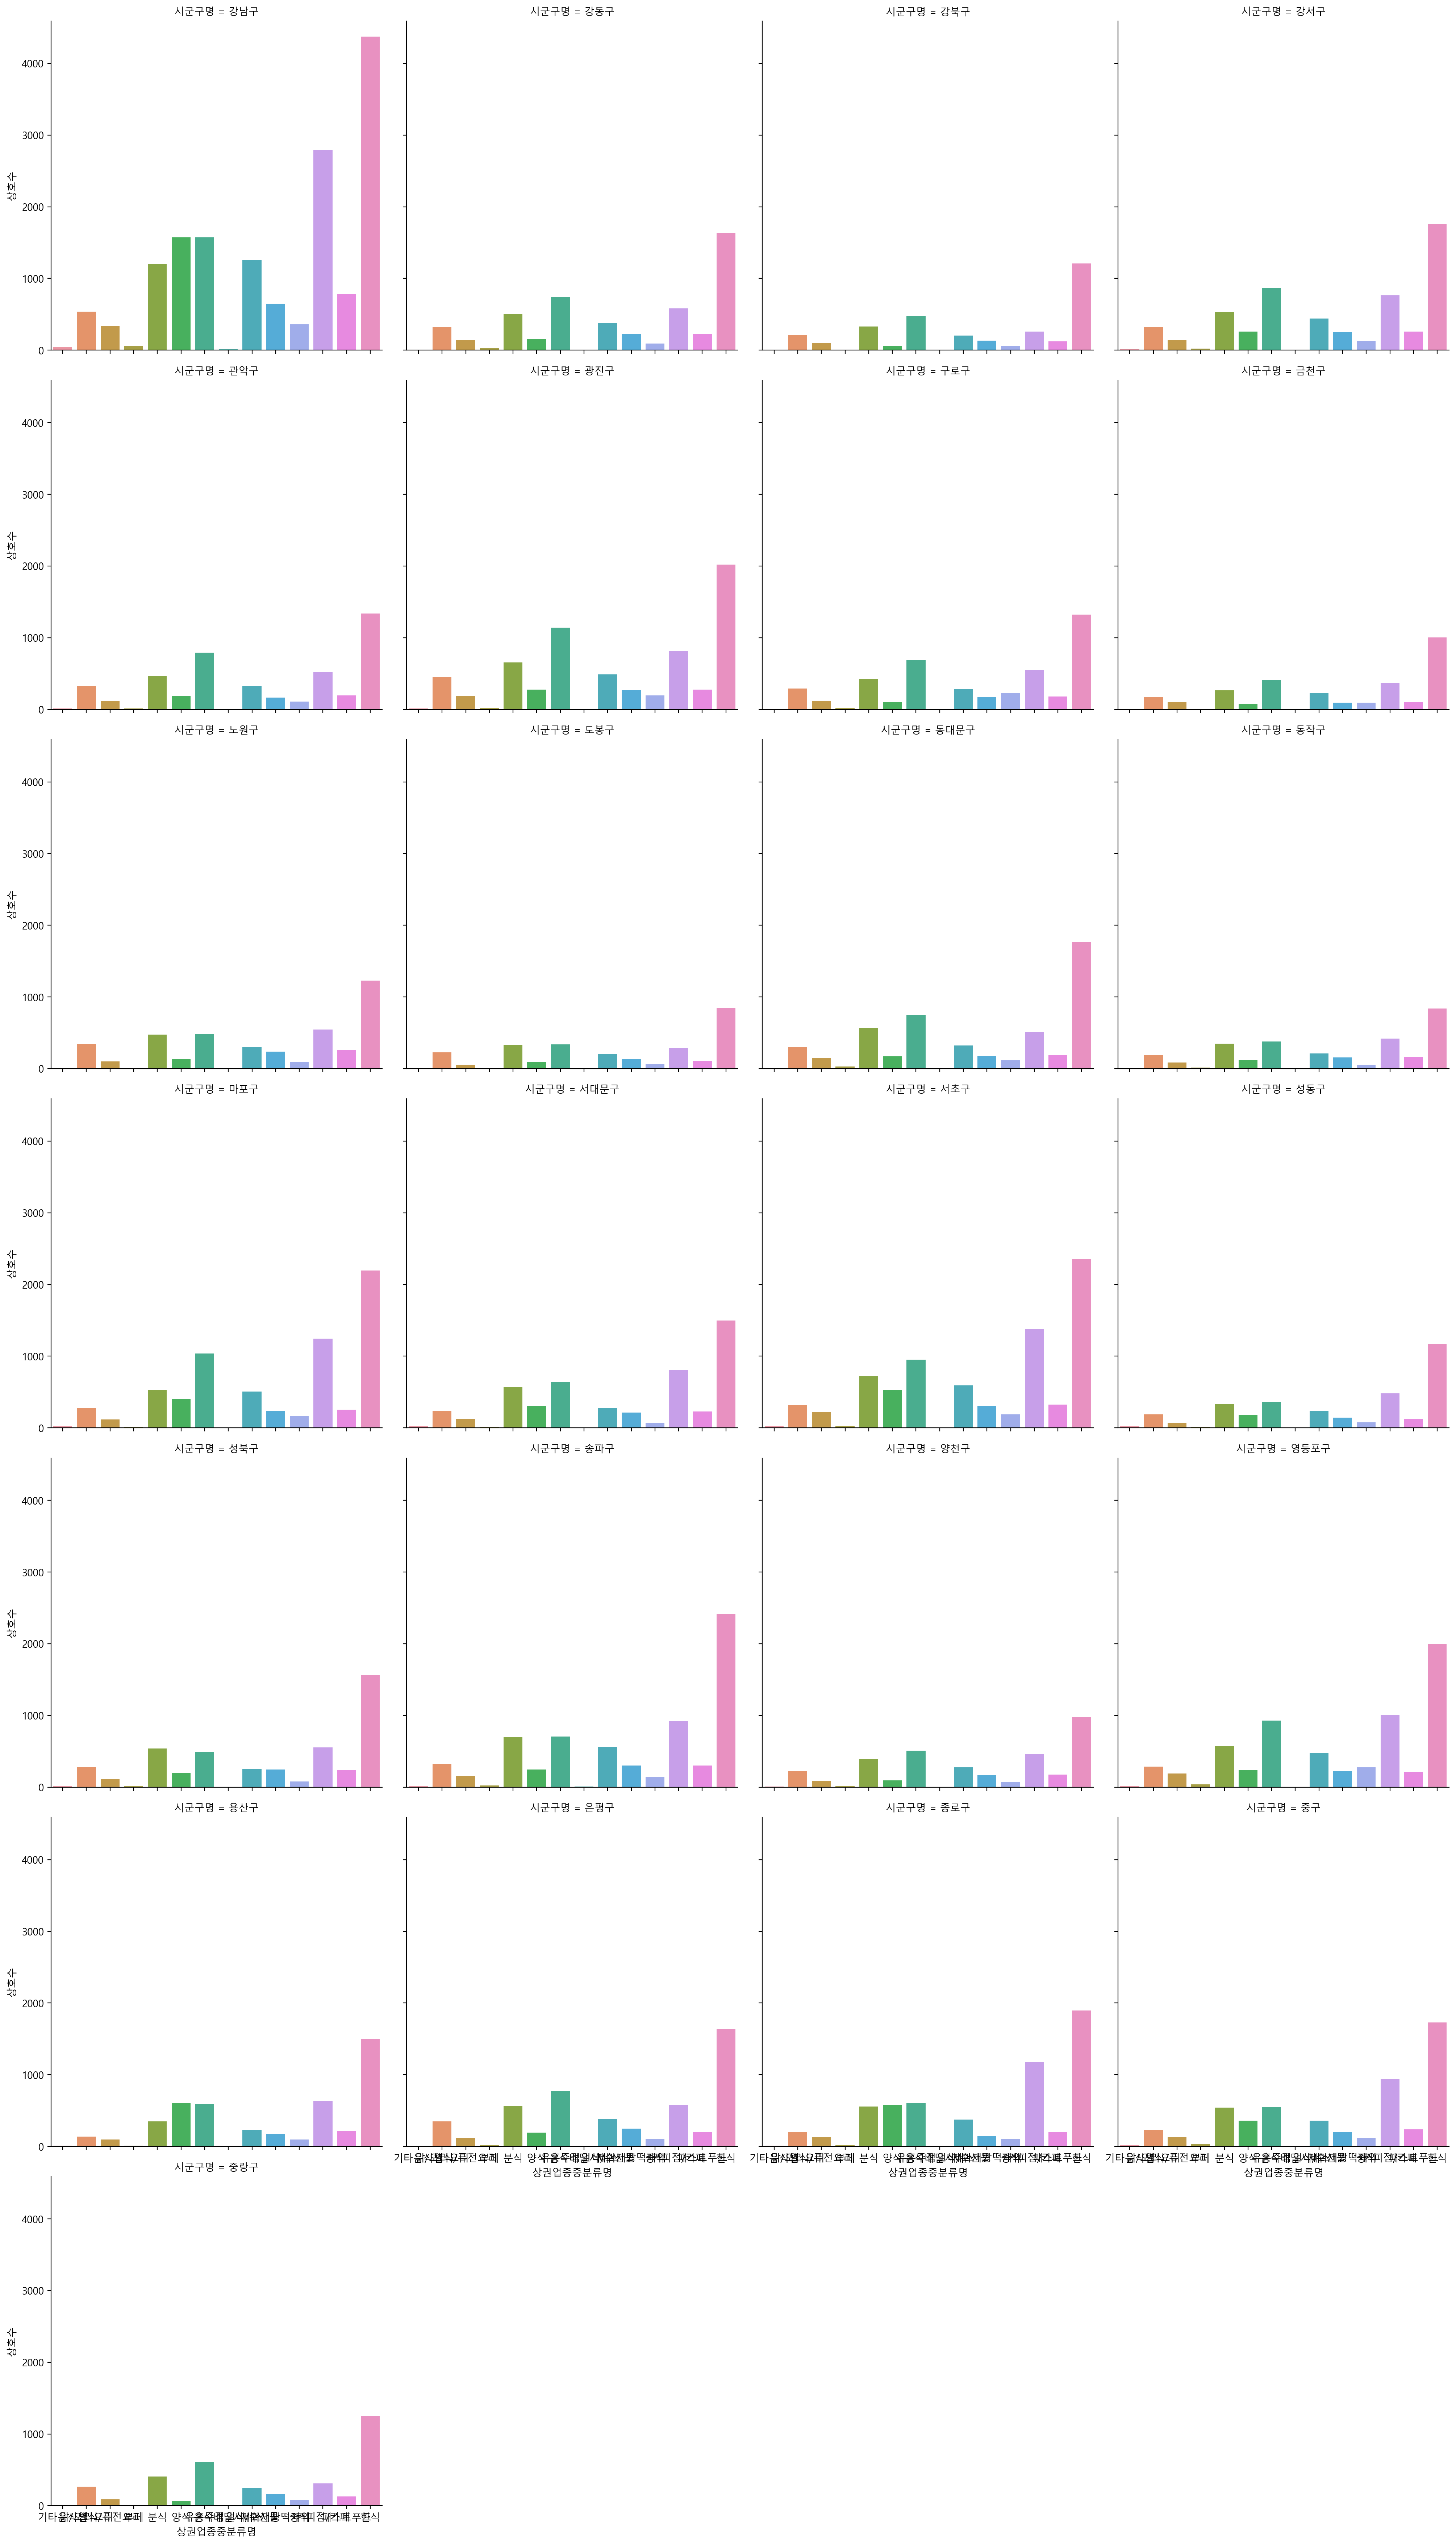

In [543]:
sns.catplot(data=food, x='상권업종중분류명', y='상호수', kind='bar', col='시군구명', col_wrap=4)
# catplot : bar, box, violin 등을 항목별로 서브플랏을 그릴 대 사용합니다.
# relplot : scatter, line 등을 항목별로 서브플랏을 그릴때 사용합니다.

---

## 구별 학원수 비교
---
- 주거입지로 문화시설이나 학원, 교육 등을 고려하게 됩니다.
- 사교육이 발달한 지역으로 대치동이나 목동을 꼽는데, 그 이외의 지역을 조회해봅니다.

## 전처리

In [544]:
# subset만들고 집계
# 학원의 분류명을 알아보기위해 '상권업종대분류명'의 unique값을 추출하고, 교육에 관련된 분류명을 확인합니다.
df['상권업종대분류명'].unique()

array(['음식', '생활서비스', '소매', '의료', '학문/교육', '관광/여가/오락', '부동산', '숙박', '스포츠'],
      dtype=object)

#### 시도명이 '서울특별시'이고, '상권업종대분류명'이 '학문/교육'인 데이터를 <span class="mark">필터링</span>하여 df_academy로 저장

In [555]:
df_academy = df[(df['시도명'] == '서울특별시') & (df['상권업종대분류명'] == '학문/교육')]

In [556]:
df_academy

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
85,GIA보석교육원,학문/교육,학원-자격/국가고시,학원-보석감정,서울특별시,강남구,압구정동,신사동,대지,639,서울특별시 강남구 신사동 639-3,서울특별시 강남구 압구정로,320,서울특별시 강남구 압구정로 320,127.036437,37.528532
101,안재형영어,학문/교육,학원-어학,학원-외국어/어학,서울특별시,양천구,목5동,목동,대지,905,서울특별시 양천구 목동 905-34,서울특별시 양천구 목동서로,133,서울특별시 양천구 목동서로 133-2,126.875973,37.531592
121,정아트,학문/교육,학원-음악미술무용,서예/서화/미술,서울특별시,강서구,염창동,염창동,대지,184,서울특별시 강서구 염창동 184-8,서울특별시 강서구 양천로73가길,21,서울특별시 강서구 양천로73가길 21,126.873645,37.550924
126,경찰태권도,학문/교육,학원-예능취미체육,태권도장,서울특별시,성북구,길음1동,길음동,대지,1283,서울특별시 성북구 길음동 1283-4,서울특별시 성북구 길음로,20,서울특별시 성북구 길음로 20,127.023020,37.604749
134,아트인스튜디오,학문/교육,학원-음악미술무용,서예/서화/미술,서울특별시,강남구,역삼1동,역삼동,대지,818,서울특별시 강남구 역삼동 818-1,서울특별시 강남구 강남대로96길,12,서울특별시 강남구 강남대로96길 12,127.028054,37.499729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573529,쌤통수학교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,서대문구,홍제2동,홍제동,대지,106,서울특별시 서대문구 홍제동 106,서울특별시 서대문구 통일로34길,24,서울특별시 서대문구 통일로34길 24,126.949389,37.585709
573654,골든벨독서실,학문/교육,도서관/독서실,독서실,서울특별시,양천구,신월2동,신월동,대지,447,서울특별시 양천구 신월동 447-5,서울특별시 양천구 월정로,56,서울특별시 양천구 월정로 56,126.841706,37.524719
573656,에이디링크연구소,학문/교육,학원기타,학원(종합),서울특별시,송파구,가락본동,가락동,대지,76,서울특별시 송파구 가락동 76,서울특별시 송파구 양재대로62길,47,서울특별시 송파구 양재대로62길 47,127.120757,37.495986
573661,도무스링구아,학문/교육,학원-보습교습입시,학원-입시,서울특별시,서초구,양재1동,우면동,대지,721,서울특별시 서초구 우면동 721-1,서울특별시 서초구 태봉로,70,서울특별시 서초구 태봉로 70,127.025571,37.464531


#### 시군구명에 의한 <span class="mark">빈도수</span>

In [557]:
df_academy["시군구명"].value_counts()

강남구     4005
서초구     2103
양천구     1881
광진구     1848
송파구     1797
강동구     1585
노원구     1582
강서구     1498
은평구     1333
관악구     1313
성북구     1246
구로구     1140
동대문구    1051
동작구     1050
마포구     1007
영등포구     984
도봉구      931
중랑구      884
서대문구     773
성동구      742
금천구      701
종로구      638
강북구      513
용산구      491
중구       413
Name: 시군구명, dtype: int64

#### 상호명에 의한 <span class="mark">빈도수</span>

In [558]:
df_academy["상호명"].value_counts(ascending=False)

점프셈교실            1659
해법수학               57
윤선생영어교실            34
뮤엠영어               27
해법영어교실             24
                 ... 
김유철어학원              1
수학논술국어학원            1
최강해법보습학원            1
튼튼영어마스터클럽개봉학원       1
최진영수학교습소            1
Name: 상호명, Length: 24616, dtype: int64

#### '시군구명', '상권업종소분류명'으로 그룹화하고, '상호명'으로 <span class="mark">빈도수</span>를 계산하여 g_academy변수에 저장

In [603]:
g_academy = df_academy.groupby(by=['시군구명', '상권업종소분류명'])['상호명'].value_counts()

In [609]:
g_academy

시군구명  상권업종소분류명   상호명     
강남구   검도도장       검도          1
                 경기검도관       1
                 대치검도관       1
                 성무관         1
                 영무관         1
                            ..
중랑구   학원-펜글씨/한문  신내서예        1
      학원/국가고시    망우새롬행정고시    1
                 새롬행정고시학원    1
      합기도장       경호무술원       1
                 신내합기도       1
Name: 상호명, Length: 29114, dtype: int64

#### groupby에 의해 집계된 시리즈에 reset_index 실행

In [608]:
g_academy.reset_index()

ValueError: cannot insert 상호명, already exists

#### 컬럼들을 '시군구명', '상권업종소분류명', '상호수'로 변경

In [607]:
g_academy

AttributeError: 'Series' object has no attribute 'columns'

In [601]:
g_academy.columns = ['시군구명', '상권업종소분류명', '상호수']

AttributeError: 'list' object has no attribute 'columns'

In [593]:
g_academy

시군구명  상권업종소분류명   상호명     
강남구   검도도장       검도          1
                 경기검도관       1
                 대치검도관       1
                 성무관         1
                 영무관         1
                            ..
중랑구   학원-펜글씨/한문  신내서예        1
      학원/국가고시    망우새롬행정고시    1
                 새롬행정고시학원    1
      합기도장       경호무술원       1
                 신내합기도       1
Name: 상호명, Length: 29114, dtype: int64

In [594]:
g_academy.columns

['시군구명', '상권업종소분류명', '상호수']

#### '상권업종소분류명'으로 빈도수를 구하고, 위에서 30개만 academy_count에 저장

In [595]:
g_academy

시군구명  상권업종소분류명   상호명     
강남구   검도도장       검도          1
                 경기검도관       1
                 대치검도관       1
                 성무관         1
                 영무관         1
                            ..
중랑구   학원-펜글씨/한문  신내서예        1
      학원/국가고시    망우새롬행정고시    1
                 새롬행정고시학원    1
      합기도장       경호무술원       1
                 신내합기도       1
Name: 상호명, Length: 29114, dtype: int64

In [599]:
g_academy['상권업종소분류명'].value_counts()

KeyError: '상권업종소분류명'

In [ ]:
academy_count = g_academy['상권업종소분류명'].value_counts(ascending=False)
academy_count

## 시각화

### g_academy를 이용해서 시군구명별 학원의 수(상호수)를 seaborn의 barplot으로 표시

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(data=g_academy, x='시군구명', y='상호수', ci=False)

### g_academy를 이용해서 상권업종소분류명별 학원의 수(상호수)를 seaborn의 barplot으로 표시

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(data=g_academy, x='상권업종소분류명', y='상호수', ci=False)

### academy_count 중에서 소분류명별 빈도수가 1000개 이상인 데이터만 추출

In [ ]:
academy_count

In [ ]:
academy_count_1000 = academy_count[academy_count > 1000]
academy_count_1000

### 1000개이상인 데이터중  컬럼인덱스값으로 df_academy를 필터링

#### 1000번이상 출현한 상권업종소분류명 값들 : academy_count_1000.index를 df_academy_selected에 저장

In [ ]:
print(df_academy.shape)
df_academy_selected = df_academy[df_academy['상권업종소분류명'].isin(academy_count_1000.index)]
print(df_academy_selected.shape)

In [ ]:
df_academy_selected['상권업종소분류명'].value_counts()

### df_academy_selected의 '시군구명'으로 빈도수를 카운트

In [ ]:
df_academy_selected['시군구명'].value_counts()

### 법정동명이 '대치동'인 자료의 상권업종소분류명의 값분포

In [ ]:
df_academy_selected.loc[df_academy_selected['법정동명'] == '대치동', '상권업종소분류명'].value_counts()

### 법정동명이 '목동'인 자료의 상권업종소분류명의 값분포

In [ ]:
df_academy_selected.loc[df_academy_selected['법정동명'] == '목동', '상권업종소분류명'].value_counts()

### 시각화를 위해 상권업종소분류명, 시군구명으로 그룹화 한후 상호명으로 count결과를 g변수에 담습니다.

In [ ]:
g = df_academy_selected.groupby(by=['상권업종소분류명', '시군구명'])['상호명'].count()
g

In [ ]:
# 그룹화된 데이터를 시각화 하게되면 멀티인덱스 값으로 표현된 자료는 차트로 보기어렵습니다.
g.plot.bar(figsize=(20, 7))

In [ ]:
g.loc['학원-입시'].plot.bar(figsize=(10, 5))

In [ ]:
g.loc['학원-입시'].sort_values().plot.barh(figsize=(10, 5))

In [ ]:
g.unstack().plot.barh(figsize=(15, 9))
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)

In [ ]:
# unstack된 그룹화 데이터에 T(transpose)가 실행되면 행과 열이 바뀌어 표시
# x축 : 시군구별 범례: 업종
g.unstack().T.plot.bar(figsize=(15, 5))
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)

### 같은 그래프를 seaborn으로 그리기

In [ ]:
# 멀티인덱스보다 컬럼으로 접근이 편하기 때문에 reset_index를 통해 인덱스값을 컬럼으로 만듭니다.
# '상호명'컬럼은 '상호수'이기 때문에 컬럼명을 변경해 줍니다.
t = g.reset_index()
t = t.rename(columns={'상호명':'상호수'})

In [ ]:
# x축에 시군구명을 y축에 상호수를 막대그래프로 그립니다.
plt.figure(figsize=(15, 4))
# sns.barplot(data=4, x="시군구명", y="상호수", ci=None)
sns.barplot(data=4, x='상권업종소분류명', y='상호수', ci=None)

In [ ]:
sns.catplot(data=t, x='상권업종소분류명', y='상호수', kind='bar', col='시군구명', col_wrap=4)

In [ ]:
df_academy_selected.head()

In [ ]:
df_academy_selected.shape

In [ ]:
# scatterplot 으로 경도와 위도를 표현하고,
# hue값을 지정하여 시군구명으로 색상을 다르게 표현합니다.
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_academy_selected, x='경도', y='위도', hue='시군구명', alpha=0.2)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)
# loc=2 오른쪽 외부, bbox_to_anchor=(1.02, 1) : 오른쪽 외부의 x좌표, y좌표

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_academy_selected, x='경도', y='위도', hue='상권업종소분류명', alpha=0.2)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)

In [ ]:
# '상권업종소분류명'이 '학원-입시'인 데이터만 그려봅니다.
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_academy_selected[df_academy_selected['상권업종소분류명'] == '학원-입시']
    , x='경도'
    , y='위도'
    , alpha=0.2
)

In [ ]:
# '상권업종소분류명'이 '학원-입시'인 데이터만 그려봅니다.
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_academy_selected[df_academy_selected['상권업종소분류명'] == '어린이집']
    , x='경도'
    , y='위도'
    , alpha=0.2
)

In [ ]:
# '상권업종소분류명'이 '학원-입시'인 데이터만 그려봅니다.
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_academy_selected[df_academy_selected['상권업종소분류명'] == '서예/서화/미술']
    , x='경도'
    , y='위도'
    , alpha=0.2
)

In [ ]:
# df_academy_selected[(df_academy_selected['상권업종소분류명'] == '학원-입시') | df_academy_selected[(df_academy_selected['상권업종소분류명'] == '어린이집')]

# df_academy_selected[df_academy_selected['상권업종소분류명'].isin(['어린이집', '학원-입시'])]

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_academy_selected[df_academy_selected['상권업종소분류명'].isin(['어린이집', '학원-입시'])]
    , x='경도'
    , y='위도'
    , hue = '상권업종소분류명'
    , palette={'어린이집':'r', '학원-입시':'b'}
    , alpha=0.2
)
# b: 파랑, g:녹색, r:빨강, c:청록, m: 자주색, y:노랑, k:검정, w:흰색

### folium으로 지도활용하기

In [561]:
import folium

long = df_academy_selected['경도'].mean()
lat = df_academy_selected['위도'].mean()

In [562]:
df_m = df_academy_selected[df_academy_selected['상권업종소분류명'].isin(['어린이집', '학원-입시'])]

In [563]:
df_m.iloc[20]

IndexError: single positional indexer is out-of-bounds

In [564]:
m = folium.Map(location=[lat, long], zoom_start=12)
folium.Marker([37.5326, 126.88], tooltip='악녀수학').add_to(m)
m

ValueError: Location values cannot contain NaNs.

### Export HTML

In [579]:
m.save('Map_01.html')

NameError: name 'm' is not defined

In [ ]:
df_m.head(3)

In [ ]:
df_m.index

In [580]:
for i in df_m.index[:10]:
    # tooltip 변수에 상호명-도로명주소 저장
    tooltip = df_m.loc[i, '상호명'] + '-' + df_m.loc[i, '도로명주소']
    lat = df_m.loc[i, '위도']
    long = df_m.loc[i, '경도']
    # tooltip과 위도 경도 출력
    print(tooltip, lat, long)

In [ ]:
long = df_academy_selected['경도'].mean()
lat = df_academy_selected['위도'].mean()
m = folium.Map(location=[lat, long], zoom_start=11)

for i in df_m.index[:] :
    tooltip = df_m.loc[i, '상호명'] +'-'+df_m.loc[i, '도로명주소']
    lat = df_m.loc[i, '위도']
    long = df_m.loc[i, '경도']
    
    if df_m.loc[i, '상권업종소분류명'] == '어린이집' :
        icon_color = 'red'
    else :
        icon_color = 'blue'
        
    folium.CircleMarker([lat, long], tooltip=tooltip, color=icon_color, radius=1).add_to(m)
    # [위도, 경도]
    # tooltip 메시지
    # color 원의 색, radius 원의 크기
m